In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [7]:
df = pd.read_csv('amazon.csv', engine='python')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **We had some eof string problem so we have to solve it in eda, thats why i used enigne = 'python'.**

# **Copy original dataset in a new dataset for EDA & other processes**

In [8]:
df1 = df.copy()

In [9]:
# Count columns in each raw line
with open("amazon.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

expected_columns = 16
broken_rows = []

for i, line in enumerate(lines):
    if line.count(",") < expected_columns - 1:
        broken_rows.append((i, line.strip()))

print(f"Total broken rows: {len(broken_rows)}")
for row_num, content in broken_rows[:5]:  # Show only first 5
    print(f"Row {row_num}: {content[:150]}...")

Total broken rows: 0


# **Now we are good to go**

In [10]:
df1.shape

(932, 16)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           932 non-null    object 
 1   product_name         932 non-null    object 
 2   category             932 non-null    object 
 3   discounted_price     932 non-null    object 
 4   actual_price         932 non-null    object 
 5   discount_percentage  932 non-null    object 
 6   rating               932 non-null    float64
 7   rating_count         930 non-null    object 
 8   about_product        932 non-null    object 
 9   user_id              932 non-null    object 
 10  user_name            932 non-null    object 
 11  review_id            932 non-null    object 
 12  review_title         932 non-null    object 
 13  review_content       932 non-null    object 
 14  img_link             932 non-null    object 
 15  product_link         932 non-null    obj

In [12]:
# Clean discounted_price
df1['discounted_price'] = df1['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean actual_price
df1['actual_price'] = df1['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean discount_percentage
df1['discount_percentage'] = df1['discount_percentage'].str.replace('%', '').astype(float)

# Convert rating to float
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')
df1['rating'].fillna(df1['rating'].mean(), inplace=True)

# Clean rating_count (remove commas and convert to int)
df1['rating_count'] = df1['rating_count'].str.replace(',', '')
df1['rating_count'] = pd.to_numeric(df1['rating_count'], errors='coerce').fillna(0).astype(int)

# Extract main category (before first '|')
df1['main_category'] = df1['category'].str.split('|').str[0]

/tmp/ipython-input-12-3254353290.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['rating'].fillna(df1['rating'].mean(), inplace=True)


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           932 non-null    object 
 1   product_name         932 non-null    object 
 2   category             932 non-null    object 
 3   discounted_price     932 non-null    float64
 4   actual_price         932 non-null    float64
 5   discount_percentage  932 non-null    float64
 6   rating               932 non-null    float64
 7   rating_count         932 non-null    int64  
 8   about_product        932 non-null    object 
 9   user_id              932 non-null    object 
 10  user_name            932 non-null    object 
 11  review_id            932 non-null    object 
 12  review_title         932 non-null    object 
 13  review_content       932 non-null    object 
 14  img_link             932 non-null    object 
 15  product_link         932 non-null    obj

In [14]:
df1.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [15]:
df1.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,932.000000,932.000000,932.000000,932.000000,932.000000
mean,3599.548948,6206.442361,51.162017,4.117275,24677.965665
std,8182.995121,12474.283180,22.010800,0.269327,51031.325280
min,39.000000,50.000000,0.000000,2.800000,0.000000
25%,279.000000,699.000000,35.000000,4.000000,1779.750000
50%,577.000000,1490.000000,55.000000,4.200000,8732.500000
75%,1799.000000,4992.250000,67.000000,4.300000,24269.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [16]:
df1.duplicated().sum()

np.int64(0)

In [17]:
df1.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


# **We already added main_technology column and now we should do more feature engineering.**

In [18]:
df1['main_category'].value_counts()

,count
main_category,
Electronics,507
Computers&Accessories,393
OfficeProducts,22
Home&Kitchen,6
MusicalInstruments,2
HomeImprovement,1
Toys&Games,1


In [19]:
df1['discount_amount'] = df1['actual_price'] - df1['discounted_price']

In [20]:
df1['discount_ratio'] = df1['discount_amount'] / df1['actual_price'] * 100

In [21]:
df1[df1['discounted_price'] <= 0]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,discount_amount,discount_ratio


In [22]:
df1['is_highly_rated'] = df1['rating'].apply(lambda x: 1 if x >= 4.0 else 0)
df1['is_highly_rated'].value_counts()

,count
is_highly_rated,
1,735
0,197


In [23]:
df1['is_popular'] = df1['rating_count'].apply(lambda x: 1 if x >= 1000 else 0)
df1['is_popular'].value_counts()

,count
is_popular,
1,766
0,166


# **Means Everything Is Discounted😱**
# **Means Most Of The Things Are Highly Rated😱**
# **Means They Are Highly Rated By Many Customers😱**

In [24]:
def price_bucket(price):
  if price < 500:
    return 'Low'
  elif price < 1500:
    return 'Mid'
  elif price < 3000:
     return 'High'
  else:
    return 'Premium'

df1['price_bucket'] = df1['discounted_price'].apply(price_bucket)
df1.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_title,review_content,img_link,product_link,main_category,discount_amount,discount_ratio,is_highly_rated,is_popular,price_bucket
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,700.0,63.694268,1,1,Low
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,150.0,42.979943,1,1,Low
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,1700.0,89.520800,0,1,Low
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,370.0,52.932761,1,1,Low
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,245.0,61.403509,1,1,Low


In [25]:
df1['price_bucket'].value_counts()

,count
price_bucket,
Low,444
Mid,227
Premium,162
High,99


In [26]:
df1['sub_category'] = df1['category'].str.split('|').str[-1]
df1['sub_category'].value_counts()

,count
sub_category,
USBCables,219
SmartWatches,75
Smartphones,68
SmartTelevisions,62
In-Ear,50
...,...
GamingKeyboards,1
SoundbarSpeakers,1
Earpads,1


In [27]:
df1['category_depth'] = df1['category'].str.count('|') + 1
df1['category_depth'].value_counts()

,count
category_depth,
83,221
45,91
70,68
61,65
62,65
63,64
64,30
73,26
80,23


In [28]:
df1['review_length'] = df1['review_content'].str.len()

In [29]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == '':
        return 'Neutral'
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df1['title_sentiment'] = df1['review_title'].apply(get_sentiment)
df1['review_content_sentiment'] = df1['review_content'].apply(get_sentiment)
df1.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,discount_amount,discount_ratio,is_highly_rated,is_popular,price_bucket,sub_category,category_depth,review_length,title_sentiment,review_content_sentiment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,700.0,63.694268,1,1,Low,USBCables,83,483,Positive,Positive
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,150.0,42.979943,1,1,Low,USBCables,83,1186,Positive,Positive
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,1700.0,89.520800,0,1,Low,USBCables,83,271,Positive,Positive
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,370.0,52.932761,1,1,Low,USBCables,83,443,Positive,Positive
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,245.0,61.403509,1,1,Low,USBCables,83,2451,Positive,Positive


In [30]:
print(df1['title_sentiment'].value_counts())
df1['review_content_sentiment'].value_counts()

title_sentiment
Positive    752
Neutral     149
Negative     31
Name: count, dtype: int64


,count
review_content_sentiment,
Positive,881
Neutral,44
Negative,7


#**Highly Number Of Positives.**
For title_sentiment:
Positive: 81.43%,
Neutral: 14.75%,
Negative: 3.40%

# **For review_content_sentiment:**
Positive:  92.43%,
Neutral: 6.83%,
Negative: 0.75%

# **Now i am removing some unnecessary columns, bcz i think they are not valueable for the upcoming analysis and insights.**

In [31]:
df1.drop(columns=['user_name', 'review_id', 'product_link'], inplace=True)

# **Now i have to download the clean for upcoming analysis and for power bi also.**

In [32]:
df1.to_csv('amazon_sails_clean_data.csv', index=False)

# **Now we are ready to some analysis.**

In [33]:
df1.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,discount_amount,discount_ratio,is_highly_rated,is_popular,price_bucket,sub_category,category_depth,review_length,title_sentiment,review_content_sentiment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,700.0,63.694268,1,1,Low,USBCables,83,483,Positive,Positive
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,150.0,42.979943,1,1,Low,USBCables,83,1186,Positive,Positive
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,1700.0,89.520800,0,1,Low,USBCables,83,271,Positive,Positive
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,370.0,52.932761,1,1,Low,USBCables,83,443,Positive,Positive
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,245.0,61.403509,1,1,Low,USBCables,83,2451,Positive,Positive


In [34]:
# Top 10 rated products (with review count > 1000)
# We have already a column named is_popular for that, so

top_rated_popular = (
    df1[df1['is_popular'] == 1]
    .sort_values(by='rating', ascending=False)
    .drop_duplicates(subset='product_id')
    .head(10)[[
        'product_name',
        'rating',
        'rating_count',
        'discounted_price',
        'is_highly_rated',
        'is_popular'
    ]]
)
top_rated_popular.reset_index(drop=True, inplace=True)
top_rated_popular

,product_name,rating,rating_count,discounted_price,is_highly_rated,is_popular
0,Spigen EZ Fit Tempered Glass Screen Protector ...,4.7,7779,999.0,1,1
1,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,4.7,5935,77990.0,1,1
2,"Logitech M331 Silent Plus Wireless Mouse, 2.4G...",4.6,12375,1295.0,1,1
3,Spigen EZ Fit Tempered Glass Screen Protector ...,4.6,6129,999.0,1,1
4,Redgear MP35 Speed-Type Gaming Mousepad (Black...,4.6,33434,299.0,1,1
5,Logitech Pebble M350 Wireless Mouse with Bluet...,4.6,10652,1490.0,1,1
6,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...",4.6,3664,999.0,1,1
7,Spigen EZ Fit Tempered Glass Screen Protector ...,4.6,26603,999.0,1,1
8,Seagate Expansion 1TB External HDD - USB 3.0 f...,4.5,50810,4098.0,1,1
9,"Dell MS116 1000Dpi USB Wired Optical Mouse, Le...",4.5,33176,299.0,1,1


In [35]:
# Average discount per sub-category

avg_discount_per_sub_category = df1.groupby('sub_category')['discount_amount'].mean().reset_index().sort_values(by='discount_amount', ascending=False).head(10)
avg_discount_per_sub_category

,sub_category,discount_amount
96,SmartTelevisions,15361.887097
81,Projectors,8303.333333
60,Monitors,8231.000000
101,StandardTelevisions,8148.833333
99,SoundbarSpeakers,7500.000000
97,SmartWatches,6271.253333
98,Smartphones,4838.955882
107,Tabletop&TravelTripods,3191.000000
105,StylusPens,2589.142857
71,Over-Ear,2525.000000


In [36]:
#  Sentiment distribution from titles
sentiment_distribution = df1['title_sentiment'].value_counts().reset_index()
sentiment_distribution.columns = ['Sentiment', 'Count']
sentiment_distribution

,Sentiment,Count
0,Positive,752
1,Neutral,149
2,Negative,31


In [37]:
# Average review length by category
avg_review_length_by_category = (
    df1.groupby('main_category')['review_length']
    .mean()
    .reset_index()
    .sort_values(by='review_length', ascending=False)
)
avg_review_length_by_category

,main_category,review_length
4,MusicalInstruments,5118.500000
1,Electronics,1808.966469
0,Computers&Accessories,1183.447837
6,Toys&Games,1001.000000
5,OfficeProducts,639.272727
3,HomeImprovement,480.000000
2,Home&Kitchen,409.500000


In [38]:
# Correlation: Discount vs. Rating
correlation = df1['discount_percentage'].corr(df1['rating'])
print("Correlation between Discount and rating", round(correlation, 4))

Correlation between Discount and rating -0.1854


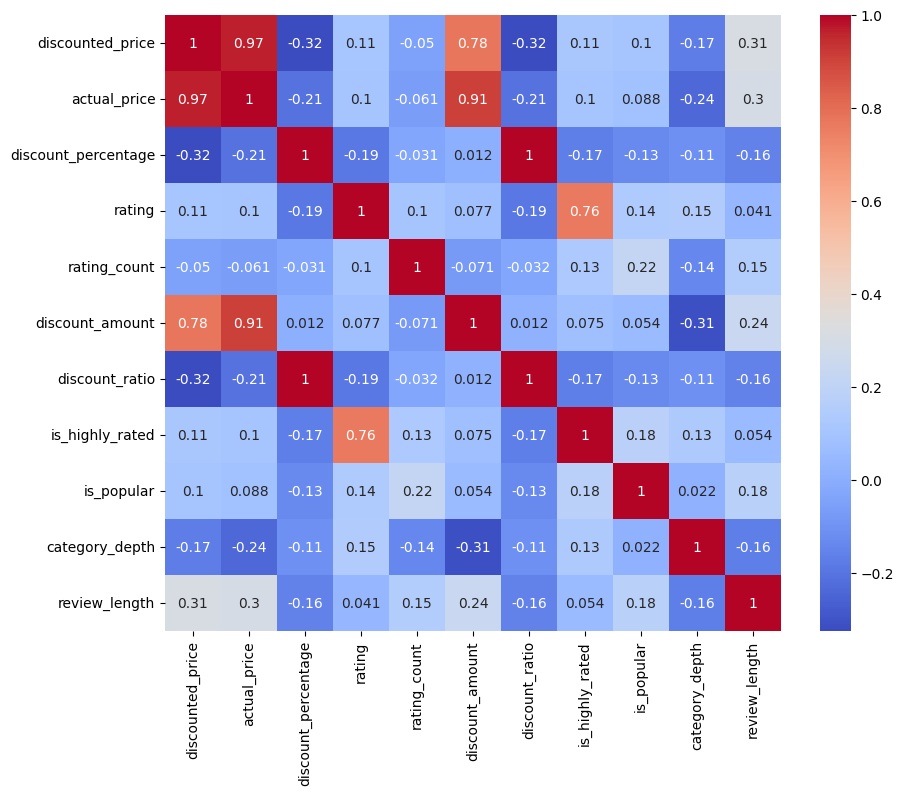

In [41]:
# Correlation By Heatmap
numeric_df = df1.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [43]:
# Price bucket vs. avg rating
avg_rating_by_bucket = (
    df1.groupby('price_bucket')['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=False)
)
avg_rating_by_bucket

,price_bucket,rating
3,Premium,4.145679
2,Mid,4.135242
0,High,4.124242
1,Low,4.096171


In [49]:
# Popularity Score (custom feature)
df1['popularity_score'] = df1['rating'] * df1['rating_count']

top_popular_products = (
    df1.sort_values(by='popularity_score', ascending=False)
       .drop_duplicates(subset='product_id')
       .head(10)[[
           'product_name',
           'rating',
           'rating_count',
           'popularity_score',
           'discounted_price',
           'price_bucket'
       ]])
top_popular_products.reset_index(drop=True, inplace=True)
top_popular_products

,product_name,rating,rating_count,popularity_score,discounted_price,price_bucket
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973,1878681.2,219.0,Low
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4.4,426973,1878681.2,309.0,Low
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4.4,426973,1878681.2,309.0,Low
3,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,1491223.3,349.0,Low
4,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,1491223.3,379.0,Low
5,boAt BassHeads 100 in-Ear Wired Headphones wit...,4.1,363711,1491215.1,365.0,Low
6,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",4.1,313836,1286727.6,8499.0,Premium
7,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",4.1,313836,1286727.6,6499.0,Premium
8,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",4.1,313832,1286711.2,7499.0,Premium
9,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",4.1,313832,1286711.2,6499.0,Premium


In [50]:
# Same Thing With Some Sklearn Preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1['popularity_score_scaled'] = scaler.fit_transform(df1[['popularity_score']])
df1['popularity_score_scaled'] = (df1['popularity_score_scaled'] * 100).round(2)
top_scaled_popular = (
    df1.sort_values(by='popularity_score_scaled', ascending=False)
       .drop_duplicates(subset='product_id')
       .head(10)[[
           'product_name',
           'rating',
           'rating_count',
           'popularity_score',
           'popularity_score_scaled',
           'discounted_price',
           'price_bucket'
       ]])
top_scaled_popular.reset_index(drop=True, inplace=True)
top_scaled_popular

,product_name,rating,rating_count,popularity_score,popularity_score_scaled,discounted_price,price_bucket
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973,1878681.2,100.00,219.0,Low
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4.4,426973,1878681.2,100.00,309.0,Low
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4.4,426973,1878681.2,100.00,309.0,Low
3,boAt BassHeads 100 in-Ear Wired Headphones wit...,4.1,363711,1491215.1,79.38,365.0,Low
4,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,1491223.3,79.38,379.0,Low
5,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,1491223.3,79.38,349.0,Low
6,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",4.1,313832,1286711.2,68.49,7499.0,Premium
7,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",4.1,313836,1286727.6,68.49,6499.0,Premium
8,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",4.1,313836,1286727.6,68.49,8499.0,Premium
9,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",4.1,313832,1286711.2,68.49,6499.0,Premium


# ***So many low price product, that's quite surprising and interesting.***
# ***So that's it for now, we will meet in power bi with an awesome dashboard.***